In [54]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 

In [55]:
! chmod 600 ~/.kaggle/kaggle.json 

In [56]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()  #unzipping the file and reading it

In [58]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf
import os , cv2 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import keras 
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [59]:
train= keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256) 
) #importing the train dataset

test= keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
) #importing the test dataset

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [60]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [61]:
# Normalize the dataset by dividing the image pixel to 255. we can also use minmax scaler to normalize the data
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) #here float is to print the reminder in float form
    return image,label 

train= train.map(process)
test= test.map(process) 

In [62]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [63]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#ANN
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))

In [64]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_16 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                      

In [65]:
from keras import callbacks# importing callbacks from keras to use early stopping

In [66]:
#early stopping helps in stopping the running of epochs, when there is a best accuracy among them.
callback= tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

In [67]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
history = model.fit(train,epochs= 100,validation_data=test,callbacks=[callback])  #fitting the train dataset

Epoch 1/100
8/8 [==============================] - 5s 207ms/step - loss: 7.5703 - accuracy: 0.6534 - val_loss: 1.8098 - val_accuracy: 0.3485
Epoch 2/100
8/8 [==============================] - 4s 162ms/step - loss: 1.9257 - accuracy: 0.9163 - val_loss: 2.8616 - val_accuracy: 0.4848
Epoch 3/100
8/8 [==============================] - 4s 163ms/step - loss: 0.9800 - accuracy: 0.9522 - val_loss: 1.4935 - val_accuracy: 0.5606
Epoch 4/100
8/8 [==============================] - 4s 188ms/step - loss: 0.2772 - accuracy: 0.9801 - val_loss: 4.5405 - val_accuracy: 0.4394
Epoch 5/100
8/8 [==============================] - 4s 162ms/step - loss: 0.0237 - accuracy: 0.9920 - val_loss: 11.6269 - val_accuracy: 0.3939
Epoch 6/100
8/8 [==============================] - 4s 166ms/step - loss: 0.0033 - accuracy: 0.9960 - val_loss: 19.3381 - val_accuracy: 0.3939
Epoch 7/100
8/8 [==============================] - 4s 188ms/step - loss: 4.2486e-04 - accuracy: 1.0000 - val_loss: 24.8255 - val_accuracy: 0.3939
Epoch 

In [53]:
len(history.history['loss'])

6

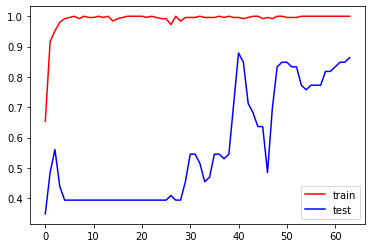

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show() 

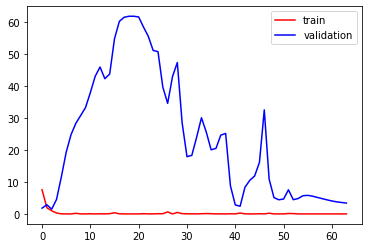

In [71]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [72]:
test_img = cv2.imread('/content/covid.jpeg')

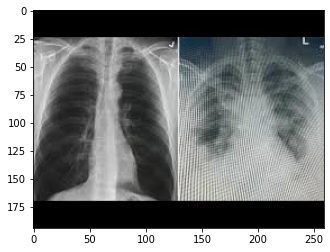

In [74]:
plt.imshow(test_img)

In [75]:
test_img.shape

(194, 259, 3)

In [76]:
test_img_scale=cv2.resize(test_img,(256,256))  #resizing the img to 256,256

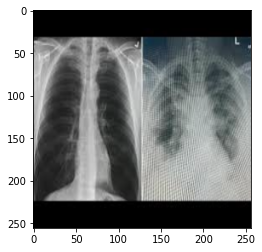

In [77]:
plt.imshow(test_img_scale)

In [78]:
test_input=test_img_scale.reshape((1,256,256,3)) #reshaping the image

In [79]:
model.predict(test_input) 

1/1 [==============================] - 0s 275ms/step


array([[0., 1., 0.]], dtype=float32)

In [80]:
np.argmax(model.predict(test_input)) 

1/1 [==============================] - 0s 28ms/step


1

In [83]:
test_img = cv2.imread('/content/normal1.jfif')


test_img_scale=cv2.resize(test_img,(256,256))  #resizing the img to 256,256

test_input=test_img_scale.reshape((1,256,256,3)) #reshaping the image

model.predict(test_input) 

np.argmax(model.predict(test_input)) 

1/1 [==============================] - 0s 26ms/step


1

In [ ]:
#0--> covid
#1-->normal
#2--> viral pneumonia

In [87]:
test_img = cv2.imread('/content/viral2.jfif')


test_img_scale=cv2.resize(test_img,(256,256))  #resizing the img to 256,256

test_input=test_img_scale.reshape((1,256,256,3)) #reshaping the image

model.predict(test_input) 

np.argmax(model.predict(test_input)) 

1/1 [==============================] - 0s 36ms/step


2